In [1]:
import pandas as pd #data manipulation
import numpy as np #calculus and algebra
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
passenger_movement_df = pd.read_csv('TRBM1.20240317134742.csv')

Exploring the data set

In [3]:
passenger_movement_df.head(30) #Displaying first 30 rows (Cork airport only opened in 1961)
#Issue with the TLIST(M1) - the months need to
#be turned into decimal form

,STATISTIC,STATISTIC Label,TLIST(M1),Month,DIRECT,Direction,TYPASS,Type of Passenger Movement,UNIT,VALUE
0,TRBM1,Passenger Movement,196101,1961M01,1,Arriving in Eire,1,Passenger Movement by Sea to All Countries,Number,20102.0
1,TRBM1,Passenger Movement,196101,1961M01,1,Arriving in Eire,11,Passenger Movement by Sea to Great Britain,Number,19963.0
2,TRBM1,Passenger Movement,196101,1961M01,1,Arriving in Eire,12,Passenger Movement by Sea to Countries Other T...,Number,139.0
3,TRBM1,Passenger Movement,196101,1961M01,1,Arriving in Eire,2,Passenger Movement Cross-Border Rail,Number,10344.0
4,TRBM1,Passenger Movement,196101,1961M01,1,Arriving in Eire,3,Passenger Movement Cross-Border Bus,Number,40063.0
5,TRBM1,Passenger Movement,196101,1961M01,1,Arriving in Eire,4,Passenger Movement by Air from All Airports,Number,18098.0
6,TRBM1,Passenger Movement,196101,1961M01,1,Arriving in Eire,41,Passenger Movement by Air from Dublin Airport,Number,16762.0
7,TRBM1,Passenger Movement,196101,1961M01,1,Arriving in Eire,42,Passenger Movement by Air from Cork Airport,Number,0.0
8,TRBM1,Passenger Movement,196101,1961M01,1,Arriving in Eire,43,Passenger Movement by Air from Shannon Airport,Number,1336.0
9,TRBM1,Passenger Movement,196101,1961M01,1,Arriving in Eire,431,Passenger Movement by Air from Shannon Airport...,Number,747.0


In [4]:
#Renaming columns intuitively
passenger_movement_df = passenger_movement_df.rename(columns={'TLIST(M1)': 'Year' })

In [5]:
#Checking for duplicates
duplicate_rows_df = passenger_movement_df[passenger_movement_df.duplicated()]
print('number of duplicate rows: ', duplicate_rows_df.shape)
#no duplicated data

number of duplicate rows:  (0, 10)


In [6]:
passenger_movement_df.count() 

STATISTIC                     12936
STATISTIC Label               12936
Year                          12936
Month                         12936
DIRECT                        12936
Direction                     12936
TYPASS                        12936
Type of Passenger Movement    12936
UNIT                          12936
VALUE                         12934
dtype: int64

In [7]:
#function to convert imported year to a decimal
def year_month_to_decimal(year_month):
    
    year = int(year_month[:4])
    month = int(year_month[4:])
    decimal_month = month / 12.0
    return year + decimal_month

In [8]:
passenger_movement_df['Year'] = passenger_movement_df['Year'].astype(str)
passenger_movement_df['decimal_year'] = passenger_movement_df['Year'].apply(year_month_to_decimal)
passenger_movement_df['decimal_year'] = passenger_movement_df['decimal_year'].astype(float)
passenger_movement_df
#applying the function to the year 

,STATISTIC,STATISTIC Label,Year,Month,DIRECT,Direction,TYPASS,Type of Passenger Movement,UNIT,VALUE,decimal_year
0,TRBM1,Passenger Movement,196101,1961M01,1,Arriving in Eire,1,Passenger Movement by Sea to All Countries,Number,20102.0,1961.083333
1,TRBM1,Passenger Movement,196101,1961M01,1,Arriving in Eire,11,Passenger Movement by Sea to Great Britain,Number,19963.0,1961.083333
2,TRBM1,Passenger Movement,196101,1961M01,1,Arriving in Eire,12,Passenger Movement by Sea to Countries Other T...,Number,139.0,1961.083333
3,TRBM1,Passenger Movement,196101,1961M01,1,Arriving in Eire,2,Passenger Movement Cross-Border Rail,Number,10344.0,1961.083333
4,TRBM1,Passenger Movement,196101,1961M01,1,Arriving in Eire,3,Passenger Movement Cross-Border Bus,Number,40063.0,1961.083333
...,...,...,...,...,...,...,...,...,...,...,...
12931,TRBM1,Passenger Movement,200912,2009M12,2,Departing Eire,41,Passenger Movement by Air from Dublin Airport,Number,664962.0,2010.000000
12932,TRBM1,Passenger Movement,200912,2009M12,2,Departing Eire,42,Passenger Movement by Air from Cork Airport,Number,76086.0,2010.000000
12933,TRBM1,Passenger Movement,200912,2009M12,2,Departing Eire,43,Passenger Movement by Air from Shannon Airport,Number,61229.0,2010.000000
12934,TRBM1,Passenger Movement,200912,2009M12,2,Departing Eire,431,Passenger Movement by Air from Shannon Airport...,Number,50767.0,2010.000000


In [9]:
passenger_movement_df.dtypes

STATISTIC                      object
STATISTIC Label                object
Year                           object
Month                          object
DIRECT                          int64
Direction                      object
TYPASS                          int64
Type of Passenger Movement     object
UNIT                           object
VALUE                         float64
decimal_year                  float64
dtype: object

In [10]:
passenger_movement_df = passenger_movement_df.drop(["STATISTIC Label", "TYPASS", "UNIT", "DIRECT", "STATISTIC","Month"], axis=1)
#removing columns which aren't needed/are duplicated
#going to keep the two year-month columns as the original form will be used later on in ML section

In [11]:
passenger_movement_df.head(20)

,Year,Direction,Type of Passenger Movement,VALUE,decimal_year
0,196101,Arriving in Eire,Passenger Movement by Sea to All Countries,20102.0,1961.083333
1,196101,Arriving in Eire,Passenger Movement by Sea to Great Britain,19963.0,1961.083333
2,196101,Arriving in Eire,Passenger Movement by Sea to Countries Other T...,139.0,1961.083333
3,196101,Arriving in Eire,Passenger Movement Cross-Border Rail,10344.0,1961.083333
4,196101,Arriving in Eire,Passenger Movement Cross-Border Bus,40063.0,1961.083333
5,196101,Arriving in Eire,Passenger Movement by Air from All Airports,18098.0,1961.083333
6,196101,Arriving in Eire,Passenger Movement by Air from Dublin Airport,16762.0,1961.083333
7,196101,Arriving in Eire,Passenger Movement by Air from Cork Airport,0.0,1961.083333
8,196101,Arriving in Eire,Passenger Movement by Air from Shannon Airport,1336.0,1961.083333
9,196101,Arriving in Eire,Passenger Movement by Air from Shannon Airport...,747.0,1961.083333


In [12]:
passenger_movement_df.shape #12936 rows of data, 10 columns

(12936, 5)

In [13]:
passenger_movement_df.info() #two values missing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12936 entries, 0 to 12935
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        12936 non-null  object 
 1   Direction                   12936 non-null  object 
 2   Type of Passenger Movement  12936 non-null  object 
 3   VALUE                       12934 non-null  float64
 4   decimal_year                12936 non-null  float64
dtypes: float64(2), object(3)
memory usage: 505.4+ KB


In [14]:
print(passenger_movement_df.isnull().values.any())

True


In [15]:
print(passenger_movement_df.isnull().sum())

Year                          0
Direction                     0
Type of Passenger Movement    0
VALUE                         2
decimal_year                  0
dtype: int64


In [16]:
#Since the number of rows with null values is very small compared to the whole data set, the rows will be removed
passenger_movement_df.dropna(axis=0,inplace=True) 

In [17]:
passenger_movement_df.shape #two rows have been deleted from the original dataset

(12934, 5)

In [18]:
passenger_movement_df.describe() #TLIST is the time so not really relevant here

,VALUE,decimal_year
count,1.293400e+04,12934.000000
mean,9.242068e+04,1985.538349
std,1.769196e+05,14.144184
min,0.000000e+00,1961.083333
25%,1.340125e+04,1973.270833
50%,3.542900e+04,1985.500000
75%,8.617450e+04,1997.750000
max,1.603381e+06,2010.000000


In [19]:
passenger_movement_df.describe(include="object")

,Year,Direction,Type of Passenger Movement
count,12934,12934,12934
unique,588,2,11
top,196101,Arriving in Eire,Passenger Movement by Sea to All Countries
freq,22,6467,1176


In [20]:
passenger_movement_df["Direction"].unique()

array(['Arriving in Eire', 'Departing Eire'], dtype=object)

In [21]:
passenger_movement_df["Type of Passenger Movement"].unique()

array(['Passenger Movement by Sea to All Countries',
       'Passenger Movement by Sea to Great Britain',
       'Passenger Movement by Sea to Countries Other Than Great Britain',
       'Passenger Movement Cross-Border Rail',
       'Passenger Movement Cross-Border Bus',
       'Passenger Movement by Air from All Airports',
       'Passenger Movement by Air from Dublin Airport',
       'Passenger Movement by Air from Cork Airport',
       'Passenger Movement by Air from Shannon Airport',
       'Passenger Movement by Air from Shannon Airport (Eastbound)',
       'Passenger Movement by Air from Shannon Airport (Westbound)'],
      dtype=object)

In [22]:
def season(x):
    month = int(str(x)[-2:])
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'
    
passenger_movement_df['Season'] =  passenger_movement_df['Year'].apply(season)

# Want to use a for loop to automate the splitting of the dataframes

In [23]:
#Splitting data into two data frames: arriving into Ireland and departing from Ireland
arriving_df = passenger_movement_df[passenger_movement_df['Direction'].isin(['Arriving in Eire'])]
departing_df = passenger_movement_df[passenger_movement_df['Direction'].isin(['Departing Eire'])]

In [24]:
arriving_df

,Year,Direction,Type of Passenger Movement,VALUE,decimal_year,Season
0,196101,Arriving in Eire,Passenger Movement by Sea to All Countries,20102.0,1961.083333,Winter
1,196101,Arriving in Eire,Passenger Movement by Sea to Great Britain,19963.0,1961.083333,Winter
2,196101,Arriving in Eire,Passenger Movement by Sea to Countries Other T...,139.0,1961.083333,Winter
3,196101,Arriving in Eire,Passenger Movement Cross-Border Rail,10344.0,1961.083333,Winter
4,196101,Arriving in Eire,Passenger Movement Cross-Border Bus,40063.0,1961.083333,Winter
...,...,...,...,...,...,...
12920,200912,Arriving in Eire,Passenger Movement by Air from Dublin Airport,638748.0,2010.000000,Winter
12921,200912,Arriving in Eire,Passenger Movement by Air from Cork Airport,76295.0,2010.000000,Winter
12922,200912,Arriving in Eire,Passenger Movement by Air from Shannon Airport,65705.0,2010.000000,Winter
12923,200912,Arriving in Eire,Passenger Movement by Air from Shannon Airport...,53430.0,2010.000000,Winter


<Axes: xlabel='VALUE', ylabel='Count'>

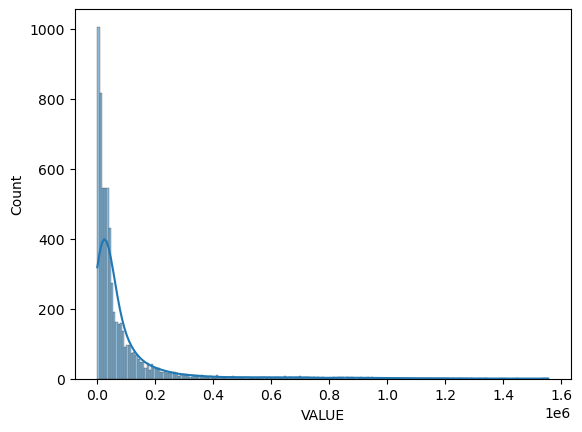

In [25]:
sns.histplot(data=departing_df, x="VALUE", kde = True) #why are there white lines?
#arriving_df["decimal_year"] = pd.to_datetime(arriving_df["decimal_year"], format='%Y.%f')
#arriving_df["sum_year"] = pd.to_datetime(arriving_df["decimal_year"], format='%Y', errors='coerce') + pd.to_timedelta((arriving_df['decimal_year'] - arriving_df['decimal_year'].astype(int)) * 365.25, unit='D')

# Group by year and sum the values in the specified column
#sum_for_year = arriving_df.groupby(arriving_df['VALUE'].dt.year)['VALUE'].sum().reset_index()

# Create a Seaborn bar plot
# plt.figure(figsize=(10, 6))
# sns.barplot(x='sum_year', y='VALUE', data=yearly_totals)
# plt.xlabel('Year')
# plt.ylabel('Sum of Values')
# plt.title('Sum of Values by Year')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()
# #need to check about how to plot histogram properly

<Axes: xlabel='VALUE', ylabel='Count'>

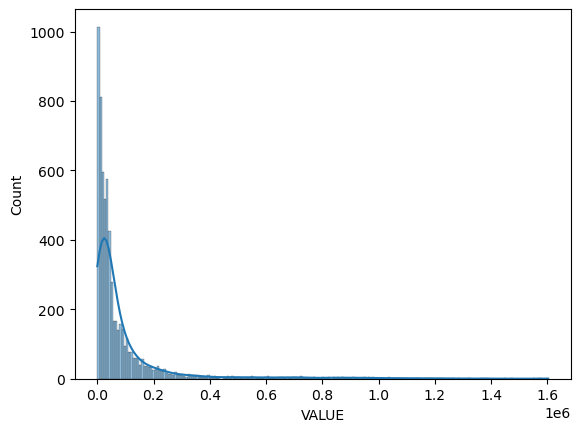

In [26]:
sns.histplot(data=arriving_df, x="VALUE", kde = True)#why are there white lines?

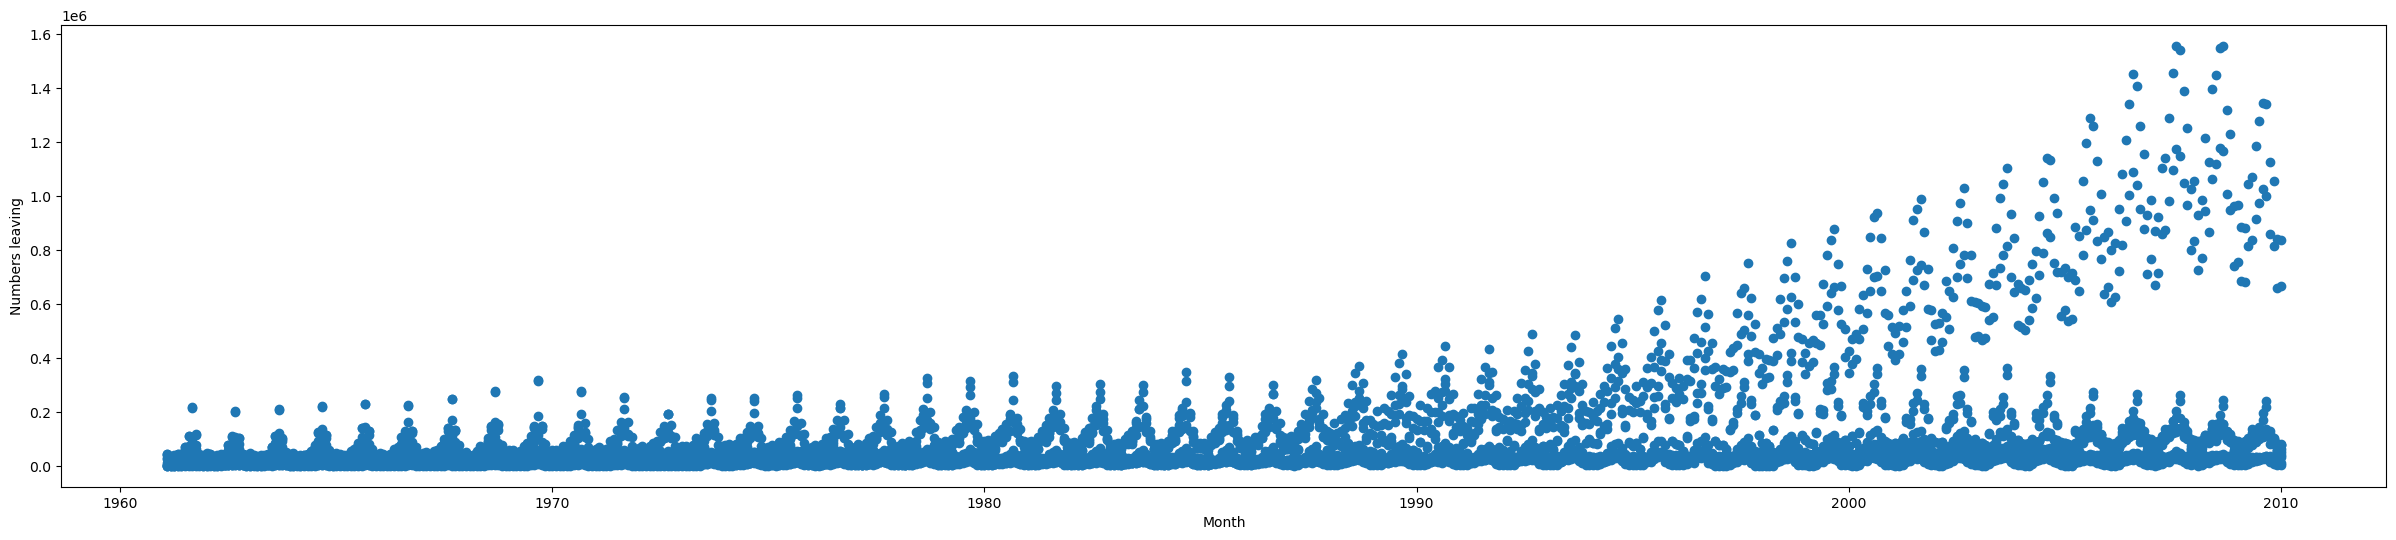

In [27]:
#this needs to be summed across all the categories and replotted
fig, ax = plt.subplots(figsize=(30,6))
ax.scatter(departing_df["decimal_year"], departing_df["VALUE"])
ax.set_xlabel("Month")
ax.set_ylabel("Numbers leaving")
plt.show()

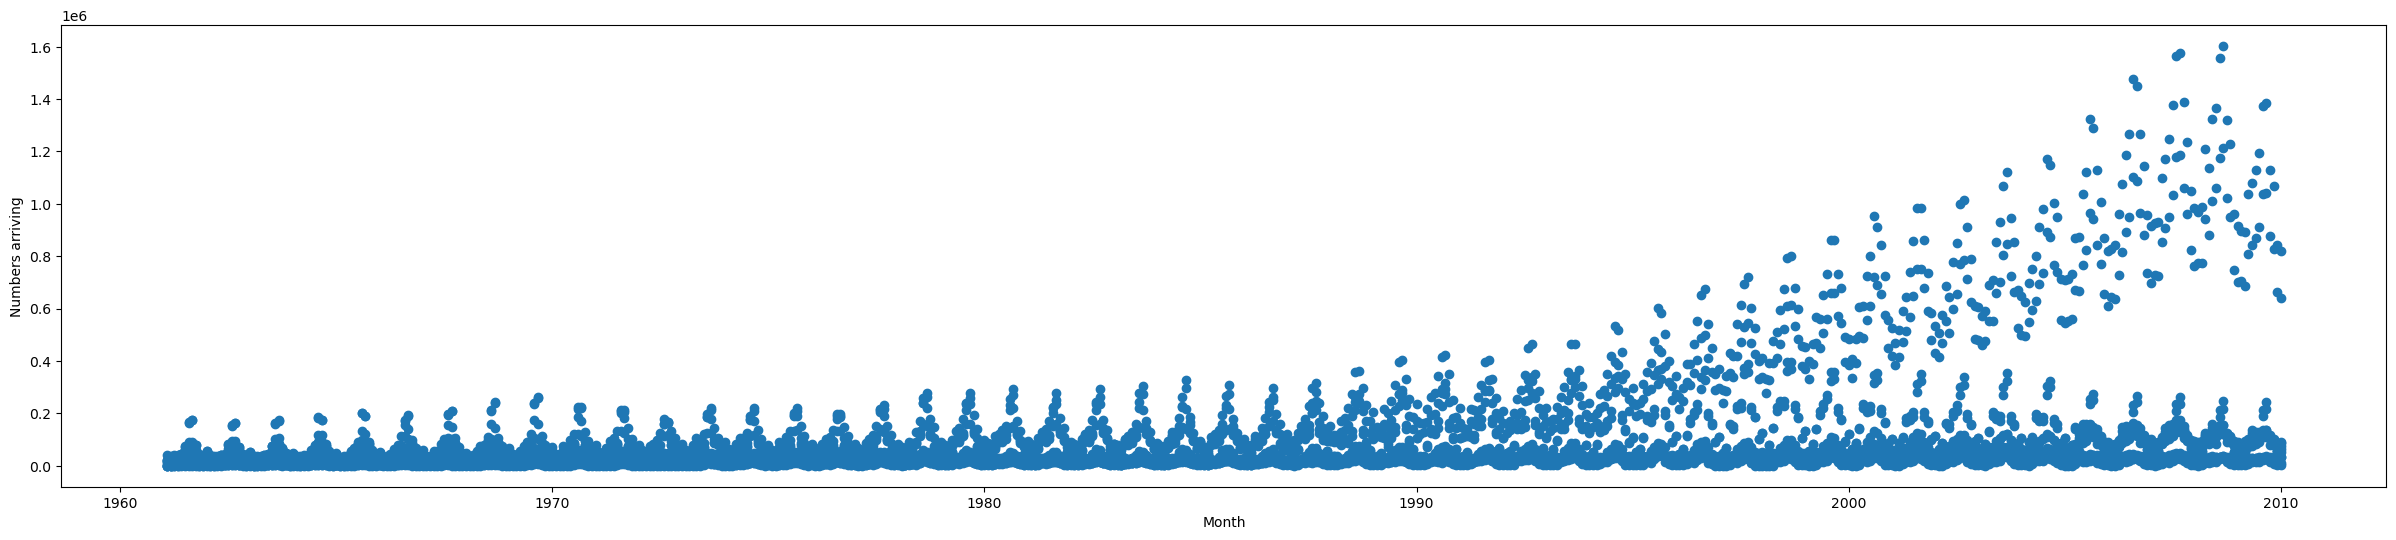

In [28]:
fig, ax = plt.subplots(figsize=(30,6))
ax.scatter(arriving_df["decimal_year"], arriving_df["VALUE"])
ax.set_xlabel("Month")
ax.set_ylabel("Numbers arriving")
plt.show()


In [29]:
arriving_by_air_df = arriving_df[arriving_df['Type of Passenger Movement'].isin(['Passenger Movement by Air from All Airports'])]  
arriving_by_sea_df = arriving_df[arriving_df['Type of Passenger Movement'].isin(['Passenger Movement by Sea to All Countries'])]
departing_by_air_df = departing_df[departing_df['Type of Passenger Movement'].isin(['Passenger Movement by Air from All Airports'])]
departing_by_sea_df = departing_df[departing_df['Type of Passenger Movement'].isin(['Passenger Movement by Sea to All Countries'])]
#Make this into a for loop
#For comparison of methods of entering the country

In [30]:
arriving_by_air_df.head(20)

,Year,Direction,Type of Passenger Movement,VALUE,decimal_year,Season
5,196101,Arriving in Eire,Passenger Movement by Air from All Airports,18098.0,1961.083333,Winter
27,196102,Arriving in Eire,Passenger Movement by Air from All Airports,17250.0,1961.166667,Winter
49,196103,Arriving in Eire,Passenger Movement by Air from All Airports,26536.0,1961.250000,Spring
71,196104,Arriving in Eire,Passenger Movement by Air from All Airports,30443.0,1961.333333,Spring
93,196105,Arriving in Eire,Passenger Movement by Air from All Airports,38424.0,1961.416667,Spring
115,196106,Arriving in Eire,Passenger Movement by Air from All Airports,58312.0,1961.500000,Summer
137,196107,Arriving in Eire,Passenger Movement by Air from All Airports,89183.0,1961.583333,Summer
159,196108,Arriving in Eire,Passenger Movement by Air from All Airports,90853.0,1961.666667,Summer
181,196109,Arriving in Eire,Passenger Movement by Air from All Airports,59328.0,1961.750000,Autumn
203,196110,Arriving in Eire,Passenger Movement by Air from All Airports,35107.0,1961.833333,Autumn


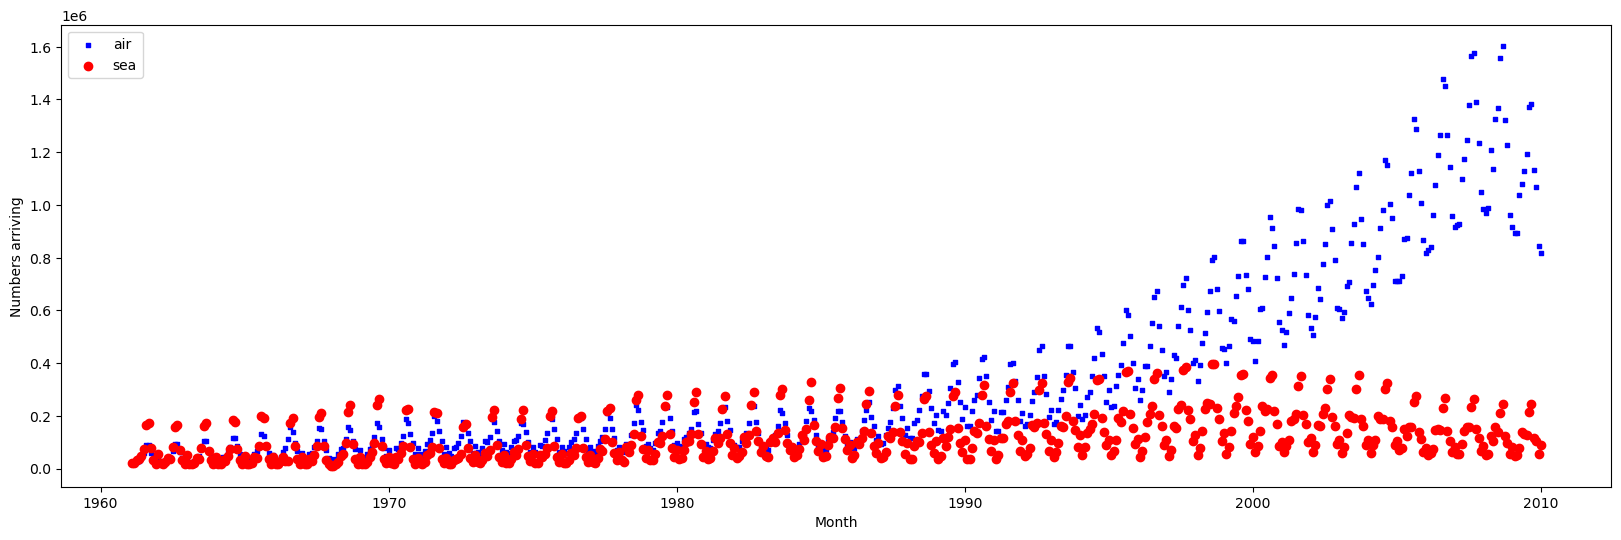

In [31]:
fig, ax = plt.subplots(figsize=(20,6))
ax.scatter(arriving_by_air_df["decimal_year"], arriving_by_air_df["VALUE"], s=10, c='b', marker="s", label='air')
ax.scatter(arriving_by_sea_df["decimal_year"], arriving_by_sea_df["VALUE"], c='r', marker="o", label='sea')
plt.legend(loc='upper left')
ax.set_xlabel("Month")
ax.set_ylabel("Numbers arriving")
plt.show()

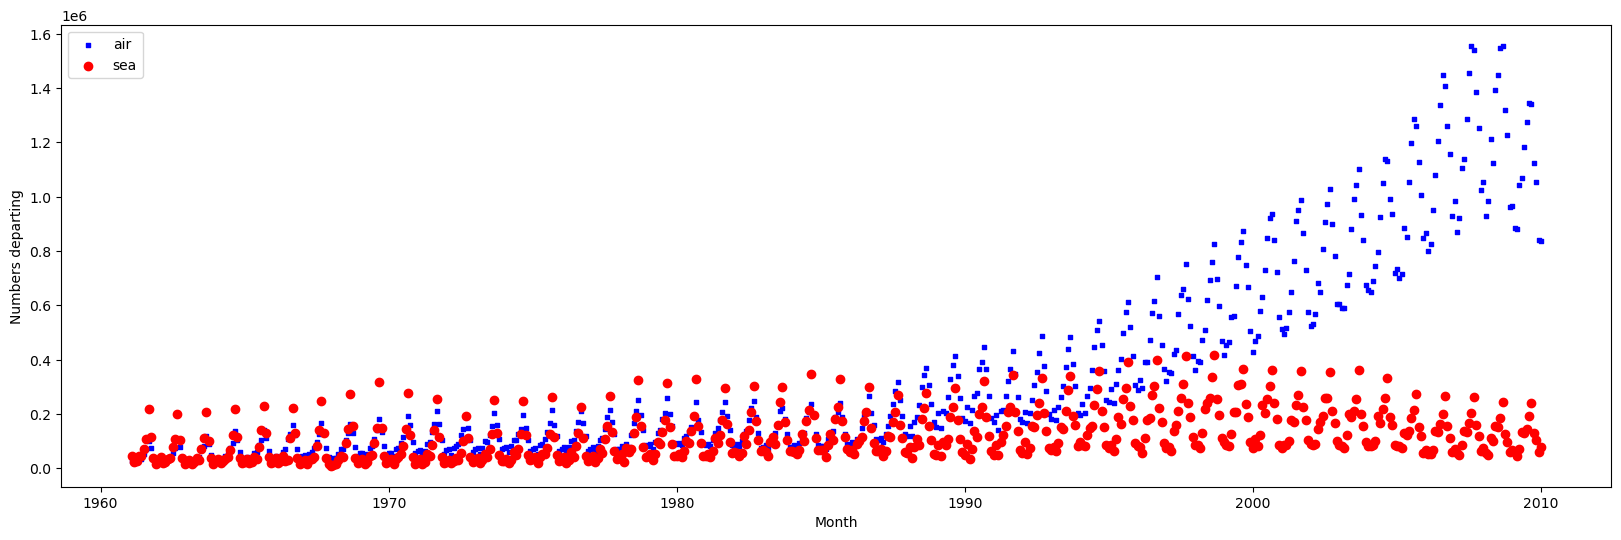

In [32]:
fig, ax = plt.subplots(figsize=(20,6))
ax.scatter(departing_by_air_df["decimal_year"], departing_by_air_df["VALUE"], s=10, c='b', marker="s", label='air')
ax.scatter(departing_by_sea_df["decimal_year"], departing_by_sea_df["VALUE"], c='r', marker="o", label='sea')
plt.legend(loc='upper left')
ax.set_xlabel("Month")
ax.set_ylabel("Numbers departing")
plt.show()

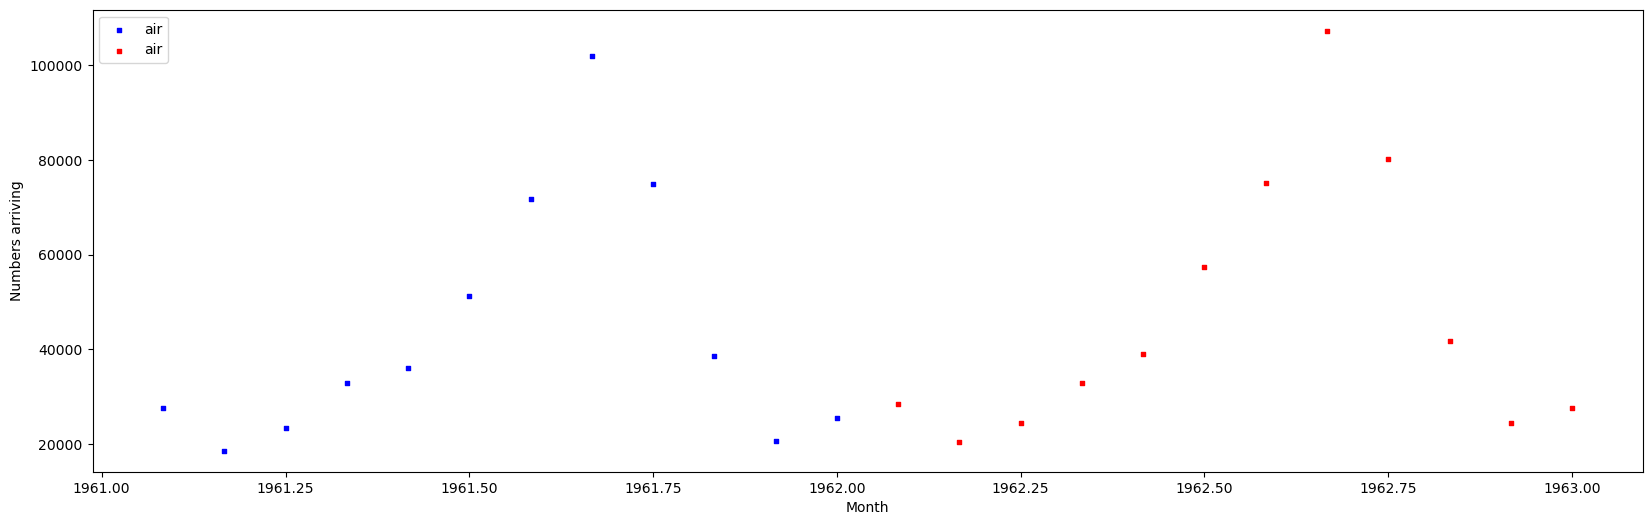

In [33]:
#look at a plot of one year - normally distributed?
departing_by_air_1961_df = departing_by_air_df[departing_by_air_df['Year'].str.contains('1961')]
departing_by_air_1962_df = departing_by_air_df[departing_by_air_df['Year'].str.contains('1962')]
fig, ax = plt.subplots(figsize=(20,6))
ax.scatter(departing_by_air_1961_df["decimal_year"], departing_by_air_1961_df["VALUE"], s=10, c='b', marker="s", label='air')
ax.scatter(departing_by_air_1962_df["decimal_year"], departing_by_air_1962_df["VALUE"], s=10, c='r', marker="s", label='air')
plt.legend(loc='upper left')
ax.set_xlabel("Month")
ax.set_ylabel("Numbers arriving")
plt.show() 

<Axes: xlabel='VALUE', ylabel='Count'>

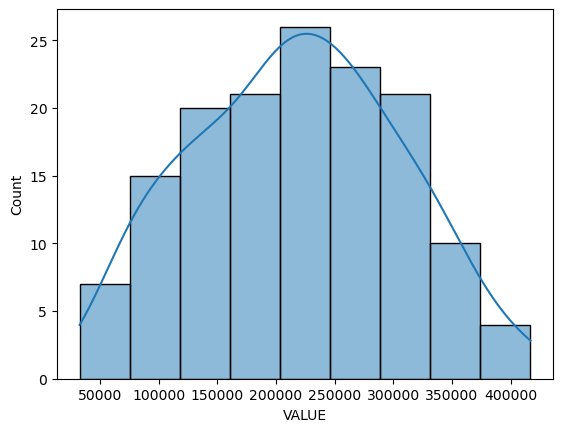

In [34]:
departing_by_sea_summer_df = departing_by_sea_df[departing_by_sea_df['Season'].str.contains('Summer')]
sns.histplot(data=departing_by_sea_summer_df, x="VALUE", kde = True)


Text(0.5, 1.0, 'Boxplot')

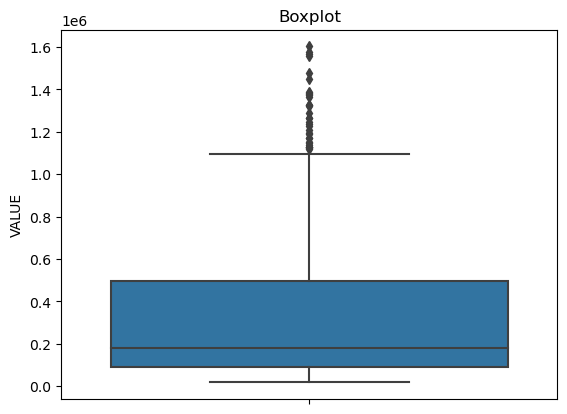

In [35]:
sns.boxplot(y = 'VALUE', data = arriving_by_air_df) #numbers arriving by sea have remained very stable over the years - presents better on the boxplot, too much variance otherwise
plt.title('Boxplot') 

Text(0.5, 1.0, 'Boxplot')

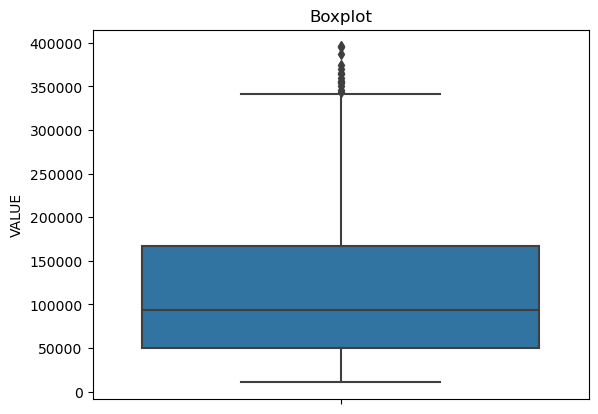

In [36]:
sns.boxplot(y = 'VALUE', data = arriving_by_sea_df) #numbers arriving by sea have remained very stable over the years - presents better on the boxplot, too much variance otherwise
plt.title('Boxplot') 

# Binomial Distribution

In [37]:
departing_by_sea_df.tail(12)

,Year,Direction,Type of Passenger Movement,VALUE,decimal_year,Season
12683,200901,Departing Eire,Passenger Movement by Sea to All Countries,59998.0,2009.083333,Winter
12705,200902,Departing Eire,Passenger Movement by Sea to All Countries,45387.0,2009.166667,Winter
12727,200903,Departing Eire,Passenger Movement by Sea to All Countries,72617.0,2009.250000,Spring
12749,200904,Departing Eire,Passenger Movement by Sea to All Countries,135269.0,2009.333333,Spring
12771,200905,Departing Eire,Passenger Movement by Sea to All Countries,130182.0,2009.416667,Spring
12793,200906,Departing Eire,Passenger Movement by Sea to All Countries,143928.0,2009.500000,Summer
12815,200907,Departing Eire,Passenger Movement by Sea to All Countries,193828.0,2009.583333,Summer
12837,200908,Departing Eire,Passenger Movement by Sea to All Countries,240445.0,2009.666667,Summer
12859,200909,Departing Eire,Passenger Movement by Sea to All Countries,129963.0,2009.750000,Autumn
12881,200910,Departing Eire,Passenger Movement by Sea to All Countries,103525.0,2009.833333,Autumn


In [38]:
#Looking into probability of arriving in to or out of the country
#Need to sum arcoss all the methods of entering and leaving to get the total inbound and outbound
#numbers arriving by departing by sea relatively stable over time - probability will be more constant than air travel
total_departing_by_sea = departing_by_sea_df['VALUE'].sum()
total_arriving_by_sea = arriving_by_sea_df['VALUE'].sum()
total_sea_df = passenger_movement_df[passenger_movement_df['Type of Passenger Movement'] == 'Passenger Movement by Sea to All Countries'] 

# Sum the values in 'column_to_sum' from the filtered DataFrame
total_movement_sea = total_sea_df['VALUE'].sum()
print(total_departing_by_sea, total_arriving_by_sea, total_movement_sea)

69555589.0 69764265.0 139319854.0


In [39]:
p = total_departing_by_sea/total_movement_sea
q = 1-p
print(p,q)

0.49925109022867625 0.5007489097713238


In [40]:
#if xx number of people are chosen at random who arrived by sea what is the probability they were entering or leaving the country?
from scipy.stats import binom
#binom.pmf(k = number that you want, n = sample size or limit, p = probability)
binom.pmf(5, 10, p)
#there is a probability of 0.246 that exactly 5 out of 10 people were departing the country by sea from 1961 to 2009

0.24609098950080252

In [41]:
binom.cdf(4, 10, p) #from of less than 5 (4 or less) departing

0.3787975198769796

In [42]:
binom.sf(3, 10, p) #4 or more departing

0.826893559403103

In [43]:
#Two probabilities are approx equal
#Expected value over the long run that 10 people would be departing
n = 10
expected_value = 10*p
expected_value

4.992510902286763

# Poisson

In [44]:
#finding the average number of people moving by by sea
from scipy.stats import poisson
total_number_of_months = len(departing_by_sea_df)
lambda_poisson_daily= (total_departing_by_sea + total_arriving_by_sea)/(total_number_of_months*365)#per day
lambda_poisson_daily #avergae number of people coming a day

649.1466498928338

In [45]:
poisson.sf(600, lambda_poisson_daily)

0.9730307061120896

# Machine Learning

# KNN Nearest Neighbours

Initial plan is to determine if the person is entering or leaving the country based off of the month they travelled, method of travel and the number of other people that travelled in that way - going to need to scale the data for sure but will do that afterwards

In [46]:
import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings
passenger_movement_df

,Year,Direction,Type of Passenger Movement,VALUE,decimal_year,Season
0,196101,Arriving in Eire,Passenger Movement by Sea to All Countries,20102.0,1961.083333,Winter
1,196101,Arriving in Eire,Passenger Movement by Sea to Great Britain,19963.0,1961.083333,Winter
2,196101,Arriving in Eire,Passenger Movement by Sea to Countries Other T...,139.0,1961.083333,Winter
3,196101,Arriving in Eire,Passenger Movement Cross-Border Rail,10344.0,1961.083333,Winter
4,196101,Arriving in Eire,Passenger Movement Cross-Border Bus,40063.0,1961.083333,Winter
...,...,...,...,...,...,...
12931,200912,Departing Eire,Passenger Movement by Air from Dublin Airport,664962.0,2010.000000,Winter
12932,200912,Departing Eire,Passenger Movement by Air from Cork Airport,76086.0,2010.000000,Winter
12933,200912,Departing Eire,Passenger Movement by Air from Shannon Airport,61229.0,2010.000000,Winter
12934,200912,Departing Eire,Passenger Movement by Air from Shannon Airport...,50767.0,2010.000000,Winter


In [47]:
#sns.heatmap(passenger_movement_df.corr(), annot = True, fmt = '.2f', linewidths = 2)

In [48]:
print(passenger_movement_df.groupby('Type of Passenger Movement').size())

Type of Passenger Movement
Passenger Movement Cross-Border Bus                                1174
Passenger Movement Cross-Border Rail                               1176
Passenger Movement by Air from All Airports                        1176
Passenger Movement by Air from Cork Airport                        1176
Passenger Movement by Air from Dublin Airport                      1176
Passenger Movement by Air from Shannon Airport                     1176
Passenger Movement by Air from Shannon Airport (Eastbound)         1176
Passenger Movement by Air from Shannon Airport (Westbound)         1176
Passenger Movement by Sea to All Countries                         1176
Passenger Movement by Sea to Countries Other Than Great Britain    1176
Passenger Movement by Sea to Great Britain                         1176
dtype: int64


In [49]:
from sklearn.preprocessing import LabelEncoder
lencoder = LabelEncoder()
#Need to encode all categorical data
passenger_movement_df_encoded = passenger_movement_df.copy()
passenger_movement_df_encoded['Season'] = lencoder.fit_transform(passenger_movement_df_encoded['Season'])
passenger_movement_df_encoded['Direction'] = lencoder.fit_transform(passenger_movement_df_encoded['Direction'])
passenger_movement_df_encoded['Type of Passenger Movement'] = lencoder.fit_transform(passenger_movement_df_encoded['Type of Passenger Movement'])

passenger_movement_df_encoded

,Year,Direction,Type of Passenger Movement,VALUE,decimal_year,Season
0,196101,0,8,20102.0,1961.083333,3
1,196101,0,10,19963.0,1961.083333,3
2,196101,0,9,139.0,1961.083333,3
3,196101,0,1,10344.0,1961.083333,3
4,196101,0,0,40063.0,1961.083333,3
...,...,...,...,...,...,...
12931,200912,1,4,664962.0,2010.000000,3
12932,200912,1,3,76086.0,2010.000000,3
12933,200912,1,5,61229.0,2010.000000,3
12934,200912,1,6,50767.0,2010.000000,3


In [50]:
from sklearn.model_selection import train_test_split
#Going to add another column based off of the time of year 
#month 02, 03, 04 = spring
#month 05, 06, 07 = summer
#month 08, 09, 10 = autumn
#month 11,12, 01 = winter
passenger_movement_df_encoded.iloc[:,2:6]

,Type of Passenger Movement,VALUE,decimal_year,Season
0,8,20102.0,1961.083333,3
1,10,19963.0,1961.083333,3
2,9,139.0,1961.083333,3
3,1,10344.0,1961.083333,3
4,0,40063.0,1961.083333,3
...,...,...,...,...
12931,4,664962.0,2010.000000,3
12932,3,76086.0,2010.000000,3
12933,5,61229.0,2010.000000,3
12934,6,50767.0,2010.000000,3


In [51]:
 passenger_movement_df_encoded.iloc[:,1] 

0        0
1        0
2        0
3        0
4        0
        ..
12931    1
12932    1
12933    1
12934    1
12935    1
Name: Direction, Length: 12934, dtype: int64

In [52]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = np.arange(1, 30)                  # number of neighbors
train_accuracy = np.zeros(len(neighbors))    # Declare and initialise the matrix
test_accuracy = np.zeros(len(neighbors)) 

from sklearn.model_selection import train_test_split
train_data,test_data,train_label,test_label = train_test_split(passenger_movement_df_encoded.iloc[:,2:6], 
                                                                 passenger_movement_df_encoded.iloc[:,1], test_size=0.3, random_state=42)
train_data.shape,train_label.shape,test_data.shape,test_label.shape

((9053, 4), (9053,), (3881, 4), (3881,))

In [53]:
for i,k in enumerate(neighbors):                          # for loop that checks the model for neighbor values 1, 2, 3, ..., 9
    knn = KNeighborsClassifier(n_neighbors = k)           # Initialise an object knn using KNeighborsClassifier method

    #Fit the model
    knn.fit(train_data, train_label)                      # Call fit method to implement the ML KNeighborsClassifier model

    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(train_data, train_label)   # Save the score value in the train_accuracy array

    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(test_data, test_label)      # Save the score value in the train_accuracy array

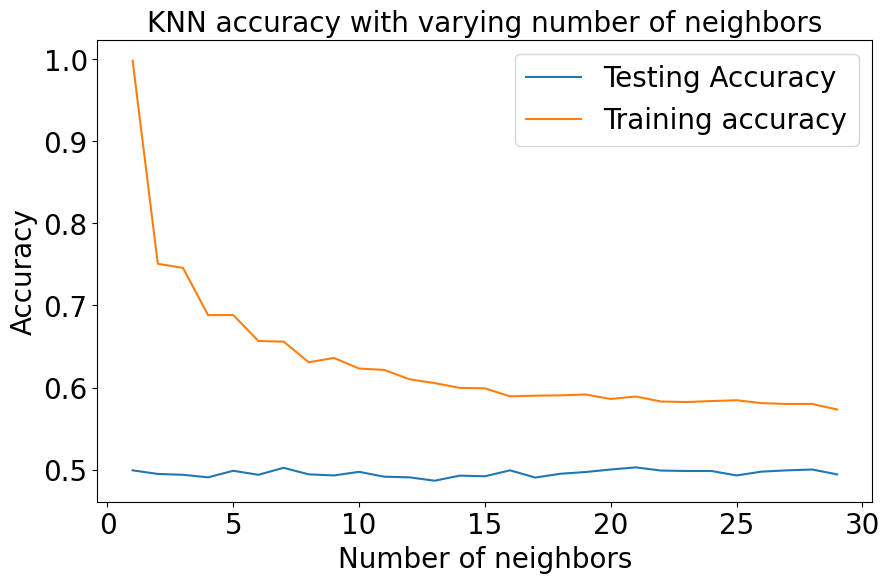

In [54]:
# Delcare the size of the array
plt.figure(figsize = (10, 6))
plt.title('KNN accuracy with varying number of neighbors', fontsize = 20)
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training accuracy')
plt.legend(prop = {'size': 20})
plt.xlabel('Number of neighbors', fontsize = 20)
plt.ylabel('Accuracy', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [55]:
# Declare and initialise an object 'KNeighborsClassifier' with 3 neighbors
knn = KNeighborsClassifier(n_neighbors = 10)

# Fit the model
knn.fit(train_data, train_label)

# Compute accuracy on the training set
train_accuracy = knn.score(train_data, train_label)

# Compute accuracy on the test set
test_accuracy = knn.score(test_data, test_label)
# Display the test accuracy
print(test_accuracy)

0.4975521772738985


In [56]:
from sklearn.metrics import confusion_matrix

# Predict the results by calling a method 'predict()'
prediction = knn.predict(test_data)

# Display the confusion matrix - 
confusion_matrix(test_label, prediction)

array([[1224,  702],
       [1248,  707]])

In [57]:
# import the library classification_report
from sklearn.metrics import classification_report

# Display the report
print(classification_report(test_label, prediction))

              precision    recall  f1-score   support

           0       0.50      0.64      0.56      1926
           1       0.50      0.36      0.42      1955

    accuracy                           0.50      3881
   macro avg       0.50      0.50      0.49      3881
weighted avg       0.50      0.50      0.49      3881



In [58]:
#scaling the data
passenger_movement_df.describe() #huge variance in value - encode to improve machine learning outcomes

,VALUE,decimal_year
count,1.293400e+04,12934.000000
mean,9.242068e+04,1985.538349
std,1.769196e+05,14.144184
min,0.000000e+00,1961.083333
25%,1.340125e+04,1973.270833
50%,3.542900e+04,1985.500000
75%,8.617450e+04,1997.750000
max,1.603381e+06,2010.000000


In [59]:
import sklearn.preprocessing as preproc
passenger_movement_df_scaled = passenger_movement_df_encoded.copy()
passenger_movement_df_scaled['VALUE'] = preproc.minmax_scale(passenger_movement_df_scaled['VALUE'])
passenger_movement_df_scaled

,Year,Direction,Type of Passenger Movement,VALUE,decimal_year,Season
0,196101,0,8,0.012537,1961.083333,3
1,196101,0,10,0.012451,1961.083333,3
2,196101,0,9,0.000087,1961.083333,3
3,196101,0,1,0.006451,1961.083333,3
4,196101,0,0,0.024987,1961.083333,3
...,...,...,...,...,...,...
12931,200912,1,4,0.414725,2010.000000,3
12932,200912,1,3,0.047453,2010.000000,3
12933,200912,1,5,0.038187,2010.000000,3
12934,200912,1,6,0.031662,2010.000000,3


In [60]:
#repeat the above process on the scaled values

In [61]:
neighbors = np.arange(1, 30)                  # number of neighbors
train_accuracy2 = np.zeros(len(neighbors))    # Declare and initialise the matrix
test_accuracy2 = np.zeros(len(neighbors)) 
train_data2,test_data2,train_label2,test_label2 = train_test_split(passenger_movement_df_scaled.iloc[:,2:6], 
                                                                 passenger_movement_df_scaled.iloc[:,1], test_size=0.05, random_state=42)
train_data2.shape,train_label2.shape,test_data2.shape,test_label2.shape

((12287, 4), (12287,), (647, 4), (647,))

In [62]:
for i,k in enumerate(neighbors):                          # for loop that checks the model for neighbor values 1, 2, 3, ..., 9
    knn = KNeighborsClassifier(n_neighbors = k)           # Initialise an object knn using KNeighborsClassifier method

    #Fit the model
    knn.fit(train_data2, train_label2)                      # Call fit method to implement the ML KNeighborsClassifier model

    #Compute accuracy on the training set
    train_accuracy2[i] = knn.score(train_data2, train_label2)   # Save the score value in the train_accuracy array

    #Compute accuracy on the test set
    test_accuracy2[i] = knn.score(test_data2, test_label2)  

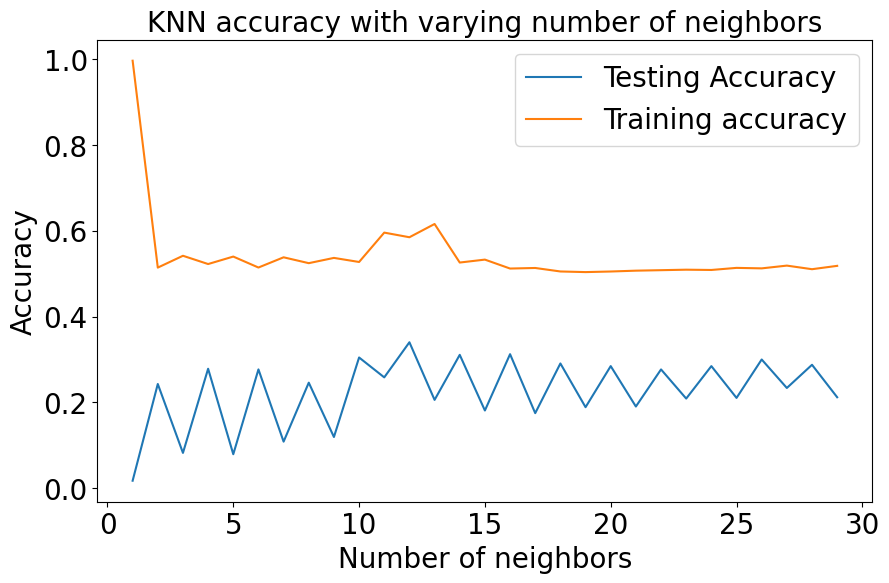

In [63]:
# Delcare the size of the array
plt.figure(figsize = (10, 6))
plt.title('KNN accuracy with varying number of neighbors', fontsize = 20)
plt.plot(neighbors, test_accuracy2, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy2, label = 'Training accuracy')
plt.legend(prop = {'size': 20})
plt.xlabel('Number of neighbors', fontsize = 20)
plt.ylabel('Accuracy', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

# Decision Trees/Random Forests

In [64]:
X = passenger_movement_df_scaled.iloc[:, 2:6].values 

y = passenger_movement_df_scaled.iloc[:, 1].values

# Display X and y 
X, y

(array([[8.00000000e+00, 1.25372572e-02, 1.96108333e+03, 3.00000000e+00],
        [1.00000000e+01, 1.24505654e-02, 1.96108333e+03, 3.00000000e+00],
        [9.00000000e+00, 8.66918094e-05, 1.96108333e+03, 3.00000000e+00],
        ...,
        [5.00000000e+00, 3.81874302e-02, 2.01000000e+03, 3.00000000e+00],
        [6.00000000e+00, 3.16624682e-02, 2.01000000e+03, 3.00000000e+00],
        [7.00000000e+00, 6.52496194e-03, 2.01000000e+03, 3.00000000e+00]]),
 array([0, 0, 0, ..., 1, 1, 1]))

In [65]:
# Split the data set into Training and Testing parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0) #25% to testing, random_state = same result against different calls

# Display the Number of rows and columns before (X, y) and after Splitting (X_train, X_test, y_train, y_test)
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((12934, 4), (12934,), (9700, 4), (3234, 4), (9700,), (3234,))

In [66]:
# Load the library 'sklearn.tree'
from sklearn.tree import DecisionTreeClassifier

# Create and initialise a DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth = 3, random_state = 0) #11 possible parameters 

# Train the classifier by calling a method 'fit()'
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [67]:
# Calculate the predicted vlaue by calling a method predict()
y_pred = classifier.predict(X_test)

              precision    recall  f1-score   support

           0       0.53      0.18      0.27      1628
           1       0.50      0.84      0.63      1606

    accuracy                           0.51      3234
   macro avg       0.51      0.51      0.45      3234
weighted avg       0.51      0.51      0.45      3234



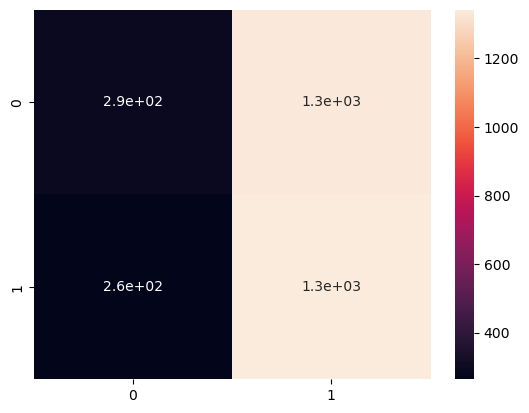

In [68]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Calculate cm by calling a method named as 'confusion_matrix'
cm = confusion_matrix(y_test, y_pred)

# Call a method heatmap() to plot confusion matrix
sns.heatmap(cm, annot = True)

# print the classification_report based on y_test and y_predict
print(classification_report(y_test, y_pred))

In [69]:
from sklearn import metrics                           # Import scikit-learn metrics module for accuracy calculation
import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5055658627087198


[Text(0.5, 0.875, 'x[1] <= 0.013\ngini = 0.5\nsamples = 9700\nvalue = [4839, 4861]'),
 Text(0.25, 0.625, 'x[1] <= 0.01\ngini = 0.5\nsamples = 3414\nvalue = [1751, 1663]'),
 Text(0.125, 0.375, 'x[0] <= 6.5\ngini = 0.5\nsamples = 2857\nvalue = [1433, 1424]'),
 Text(0.0625, 0.125, 'gini = 0.499\nsamples = 1631\nvalue = [773, 858]'),
 Text(0.1875, 0.125, 'gini = 0.497\nsamples = 1226\nvalue = [660, 566]'),
 Text(0.375, 0.375, 'x[1] <= 0.013\ngini = 0.49\nsamples = 557\nvalue = [318, 239]'),
 Text(0.3125, 0.125, 'gini = 0.492\nsamples = 549\nvalue = [310, 239]'),
 Text(0.4375, 0.125, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.75, 0.625, 'x[1] <= 0.014\ngini = 0.5\nsamples = 6286\nvalue = [3088, 3198]'),
 Text(0.625, 0.375, 'x[2] <= 1963.583\ngini = 0.482\nsamples = 190\nvalue = [77, 113]'),
 Text(0.5625, 0.125, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.6875, 0.125, 'gini = 0.487\nsamples = 184\nvalue = [77, 107]'),
 Text(0.875, 0.375, 'x[1] <= 0.014\ngini = 0.5\nsamples =

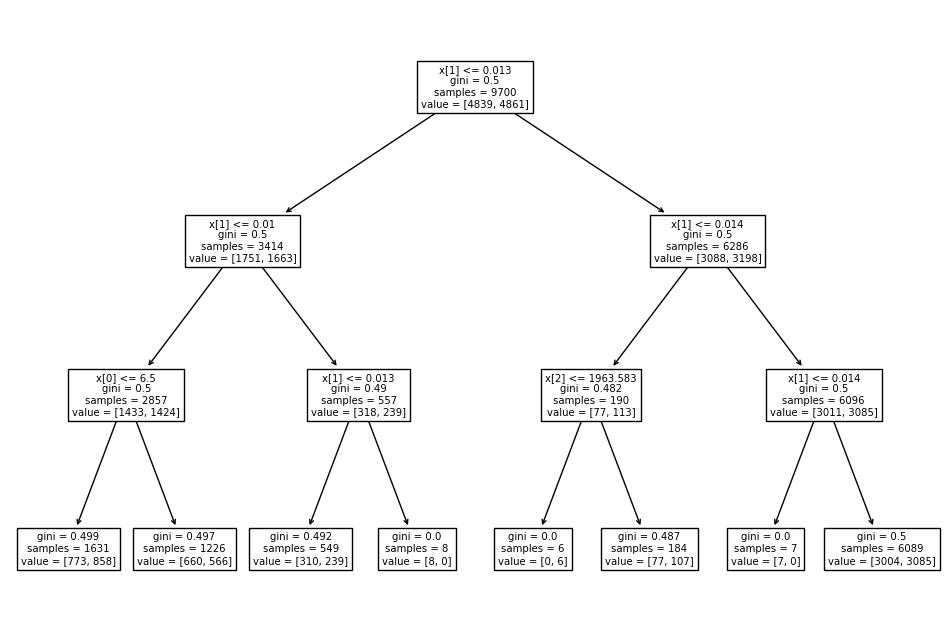

In [70]:
import matplotlib.pyplot as plt
from sklearn import tree

# Set the size of the figure
plt.figure(figsize = (12, 8))

# Display the tree by calling a method plot_tree()
tree.plot_tree(classifier.fit(X_train, y_train)) 

In [71]:
# from matplotlib.colors import ListedColormap

# # Store the data into X_set and y_set
# X_set, y_set = X_train, y_train

# X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
#                      np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

# plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
#              alpha = 0.75, cmap = ListedColormap(('red', 'green')))
# plt.xlim(X1.min(), X1.max())
# plt.ylim(X2.min(), X2.max())

# for i, j in enumerate(np.unique(y_set)):
#     plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
#                 c = ListedColormap(('red', 'green'))(i), label = j)
# plt.title('Decision Tree Classification (Training set)')
# plt.xlabel('Age')
# plt.ylabel('Estimated Salary')
# plt.legend()
# plt.show()

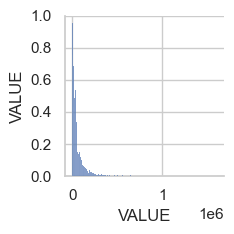

In [72]:
# import the libraries for the plot

# Set the style for the plot using swaborn library
sns.set(style='whitegrid', context='notebook')

# Consider the following columns from the entire dataset
cols = ['VALUE']

# Display the pairplot using the above-mentioned columns
sns.pairplot(passenger_movement_df[cols], height = 2.5)

plt.tight_layout()

# plt.savefig('./figures/scatter.png', dpi=300)
plt.show()

In [73]:
class LinearRegressionGD(object):
    
    def __init__(self, eta = 0.001, n_iter = 20):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return self.net_input(X)

In [76]:
X = passenger_movement_df_scaled[['decimal_year']].values
y = passenger_movement_df_scaled[['VALUE']].values

In [77]:
X.shape, y.shape

((12934, 1), (12934, 1))

In [79]:
# Reshape the (506, 1) to (506,) array for Machine Learning model
y = np.reshape(y, 12934)

# Display the number of rows and columns
X.shape, y.shape

((12934, 1), (12934,))

In [80]:
lr = LinearRegressionGD()
lr.fit(X, y)

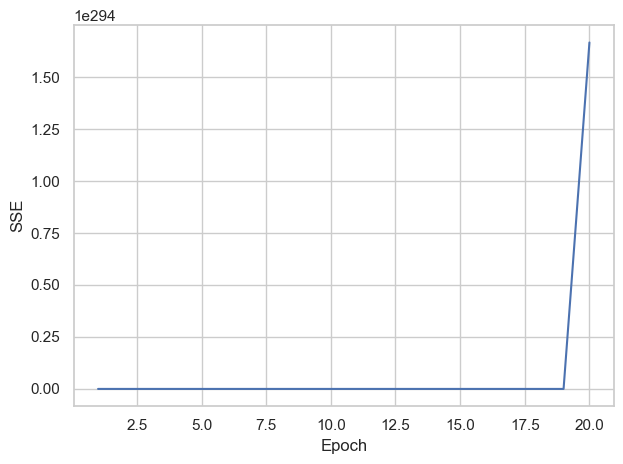

In [81]:
# Draw a plot using linear regression iterations and cost
plt.plot(range(1, lr.n_iter + 1), lr.cost_)
plt.ylabel('SSE')           # SSE means 'sum of squares error'
plt.xlabel('Epoch')         # The number of epochs is a hyperparameter that defines the number times 
                            # that the learning algorithm will work through the entire training 
                            # dataset. One epoch means that each sample in the training dataset has 
                            # had an opportunity to update the internal model parameters. 
                            # An epoch is comprised of one or more batches.
plt.tight_layout()
plt.savefig('cost.png', dpi = 300)
plt.show()

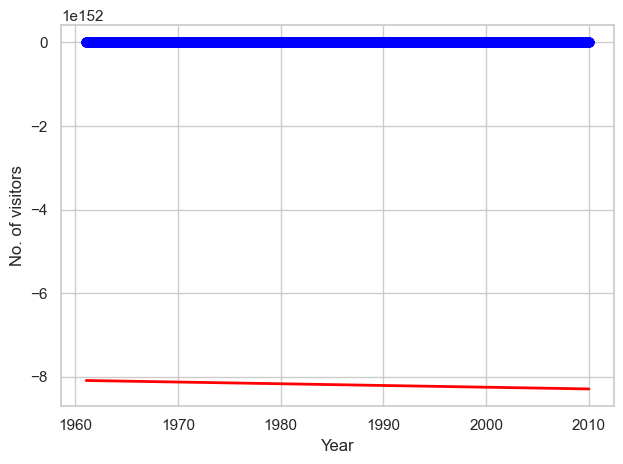

In [85]:
# Method or Function for Linear Regression plot
def lin_regplot(X, y, model):
    plt.scatter(X, y, c = 'blue')
    plt.plot(X, model.predict(X), color = 'red', linewidth = 2)    
    return
# Call the method lin_regplot()
lin_regplot(X, y, lr)
plt.xlabel('Year')
plt.ylabel('No. of visitors')
plt.tight_layout()
# plt.savefig('./figures/gradient_fit.png', dpi=300)
plt.show()

In [84]:
# Display the slope and intercept of the line
print('Slope: %.3f' % lr.w_[1])
print('Intercept: %.3f' % lr.w_[0])

Slope: -412257887866081069265874707517868060253273047318925651643731678894328718756954365480518256041672762945842409295650763392042766102365550097065492611072.000
Intercept: -207619747328624081761129852256119688384109643277037215639429690260036163810515234368975213158615344064552540457765837171942951080634635238326140928.000
